In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

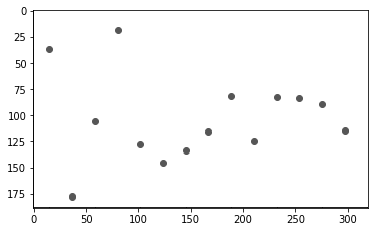

In [2]:
img = cv2.imread('train.png', cv2.IMREAD_GRAYSCALE) # reads image 'opencv-logo.png' as grayscale
plt.imshow(img, cmap='gray')

In [3]:
img.shape

(189, 320)

In [4]:
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(img)
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [5]:
size_keypoints = len(keypoints)
X_coordinates = np.zeros(size_keypoints)
Y_coordinates = np.zeros(size_keypoints)
for i in range(size_keypoints):
    X_coordinates[i] = keypoints[i].pt[0]
    Y_coordinates[i] = img.shape[0]-keypoints[i].pt[1]
    

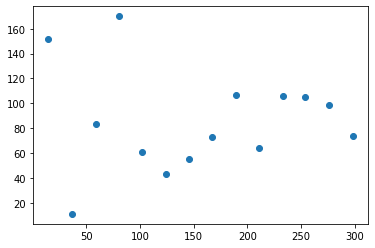

In [6]:
plt.scatter(X_coordinates, Y_coordinates)
plt.savefig("test.png")

In [7]:
img.shape

(189, 320)

In [8]:
xaxis_min = -0.6
xaxis_max = 14
yaxis_min = -4.2 
yaxis_max = 6
delta_x = (xaxis_max - xaxis_min)/img.shape[1]
delta_y = (yaxis_max - yaxis_min)/img.shape[0]

In [24]:
X_data = np.zeros(size_keypoints)
Y_data = np.zeros(size_keypoints)
for i in range(size_keypoints):
    X_data[i] = xaxis_min + delta_x *X_coordinates[i]
    Y_data[i] = yaxis_min + delta_y *Y_coordinates[i]

In [26]:
dict = {}
for i in range(size_keypoints):
    dict[X_data[i]] = Y_data[i]
dict

{1.0881249999999998: -3.6063492063492064,
 5.0575: -1.8793650793650798,
 6.06125: -1.2317460317460323,
 4.05375: -0.9079365079365083,
 9.026875: -0.7460317460317465,
 7.019375: -0.2603174603174607,
 12.99625: -0.20634920634920695,
 2.091875: 0.27936507936507926,
 11.9925: 1.1428571428571423,
 10.98875: 1.466666666666666,
 10.030625: 1.5206349206349197,
 8.023125: 1.5746031746031743,
 0.08437499999999998: 4.003174603174602,
 3.0956249999999996: 4.974603174603174}

In [27]:
import operator
sorted_xy = sorted(dict.items(), key=operator.itemgetter(0))

In [47]:
data = pd.DataFrame(sorted_xy)
data.rename(columns = {0:"X_DATA",1:"Y_DATA"})

,X_DATA,Y_DATA
0,0.084375,4.003175
1,1.088125,-3.606349
2,2.091875,0.279365
3,3.095625,4.974603
4,4.053750,-0.907937
5,5.057500,-1.879365
6,6.061250,-1.231746
7,7.019375,-0.260317
8,8.023125,1.574603
9,9.026875,-0.746032


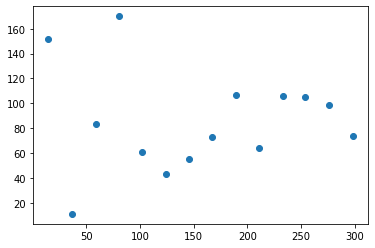

In [49]:
plt.scatter(X_coordinates,Y_coordinates)

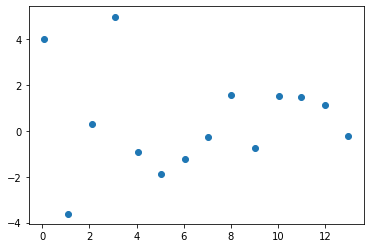

In [25]:
plt.scatter(X_data,Y_data)

In [51]:
plt.scatter(data['X_DATA'],data['Y_DATA])

AttributeError: 'DataFrame' object has no attribute 'X_DATA'

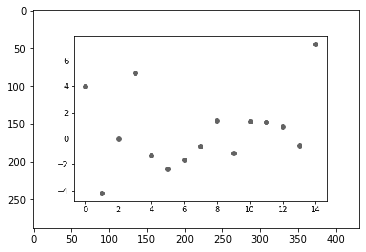

In [14]:
train_withoutcrop = cv2.imread("train_withoutcrop.png",0)
plt.imshow(train_withoutcrop,cmap="gray")

In [15]:
train_data = pd.read_csv('Train_data.csv')

In [16]:
def error_cal(train_data, test_data):
    error = 0
    for i in range(test_data.shape[0]):
        x_diff = train_data["X_DATA"][i] - test_data["X_DATA"][i]
        y_diff = train_data["Y_DATA"][i] - test_data["Y_DATA"][i]
        err_point = (x_diff**2 + y_diff**2)**0.5
        error = error + err_point
    return error 

In [17]:
test_data = data 
print(error_cal(train_data,test_data))

140.0280130190751


In [18]:
pd.concat([train_data,test_data],axis=1,join='inner')

,X_DATA,Y_DATA,Y_DATA,X_DATA
0,0.0,4.015090,0.084375,4.003175
1,1.0,-4.183131,1.088125,-3.606349
2,2.0,-0.012692,2.091875,0.279365
3,3.0,5.069127,3.095625,4.974603
4,4.0,-1.312228,4.053750,-0.907937
5,5.0,-2.312766,5.057500,-1.879365
6,6.0,-1.638286,6.061250,-1.231746
7,7.0,-0.601754,7.019375,-0.260317
8,8.0,1.415394,8.023125,1.574603
9,9.0,-1.121968,9.026875,-0.746032


In [19]:
data.to_csv("test_data.csv")